# Laboratorio 1: Regresión en Boston

En este laboratorio deben hacer experimentos de regresión con el conjunto de datos "Boston house prices dataset".

Estudiarán el dataset, harán visualizaciones y seleccionarán atributos relevantes a mano.

Luego, entrenarán y evaluarán diferentes tipos de regresiones, buscando las configuraciones que mejores resultados den.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Carga del Conjunto de Datos

Cargamos el conjunto de datos y vemos su contenido.

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [3]:
# print(boston['DESCR'])   # descripción del dataset
# boston['data']           # matriz con los datos de entrada (atributos)
# boston['target']         # vector de valores a predecir
# boston['feature_names']  # nombres de los atributos para cada columna de 'data'

In [4]:
boston['data'].shape, boston['target'].shape

((506, 13), (506,))

## División en Entrenamiento y Evaluación

Dividimos aleatoriamente los datos en 80% para entrenamiento y 20% para evaluación:

In [5]:
from sklearn.model_selection import train_test_split
X, y = boston['data'], boston['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
X_train.shape, X_test.shape

((404, 13), (102, 13))

## Ejercicio 1: Descripción de los Datos y la Tarea

Responda las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponibles para hacer la predicción?
4. ¿Qué atributos imagina ud. que serán los más determinantes para la predicción?
5. ¿Qué problemas observa a priori en el conjunto de datos? ¿Observa posibles sesgos, riesgos, dilemas éticos, etc? Piense que los datos pueden ser utilizados para hacer predicciones futuras.

**No hace falta escribir código para responder estas preguntas.**

In [ ]:
boston # es un diccionario, todo esto se trabaja en numpy no en pandas

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

In [ ]:
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [ ]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu


1. ¿De qué se trata el conjunto de datos?

El conjunto de datos se trata de 506 instancias con 13 variables + 1 variable objetivo.

Estos datos relacionan el precio medio de propiedades en Boston agrupadas en funcion de 13 caracteiristicas de estas.

2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?

La variable objetivo es el precio medio de casas ocupadas por sus dueños expresado en miles de dolares.

3. ¿Qué información (atributos) hay disponibles para hacer la predicción?

      - **CRIM**     indice de criminalidad en la ciudad
      - **ZN**       proporción de zonas residenciales para lotes de más de 25,000 pies cuadrados.
      - **INDUS**    proporción de zonas industrial por ciudad
      - **CHAS**     Variable discreta de Charles River (= 1 si limita con el río; 0 en caso contrario)
      - **NOX**      concentración de óxido nítrico (partes por 10 millones)
      - **RM**       número medio de habitaciones por vivienda
      - **AGE**      proporción de unidades ocupadas por sus propietarios construidas antes de 1940
      - **DIS**      distancias ponderadas a cinco centros de empleo de Boston
      - **RAD**      índice de accesibilidad a carreteras radiales
      - **TAX**      Tasa de impuesto al valor total de la propiedad por $ 10,000
      - **PTRATIO**  Proporción alumno-maestro por ciudad
      - **B**        1000 (Bk - 0.63) ^ 2 donde Bk es la proporción de negros por ciudad
      - **LSTAT**    % población clase baja
      - **MEDV**     Valor medio de las viviendas habitadas por sus propietarios en $ 1000

Todas las variables son numericas reales positivas


4. ¿Qué atributos imagina ud. que serán los más determinantes para la predicción?

imaginamos que los atributos que pueden llegar a ser más deeterminantes serian:
RM (número de viviendas), antiguedad, proporcion de zona residencial y % de población de clase baja

5. ¿Qué problemas observa a priori en el conjunto de datos? ¿Observa posibles sesgos, riesgos, dilemas éticos, etc? Piense que los datos pueden ser utilizados para hacer predicciones futuras.

Se observa posibles dilemas eticos, sobre todo por el atributo B. Los datos posiblemente sirvan para predicciones futuras, pero con el tiempo estas predicciones podrian ser cada vez más imprecisas 


## Ejercicio 2: Visualización de los Datos

1. Para cada atributo de entrada, haga una gráfica que muestre su relación con la variable objetivo.
2. Estudie las gráficas, identificando **a ojo** los atributos que a su criterio sean los más informativos para la predicción.
3. Para ud., ¿cuáles son esos atributos? Lístelos en orden de importancia.

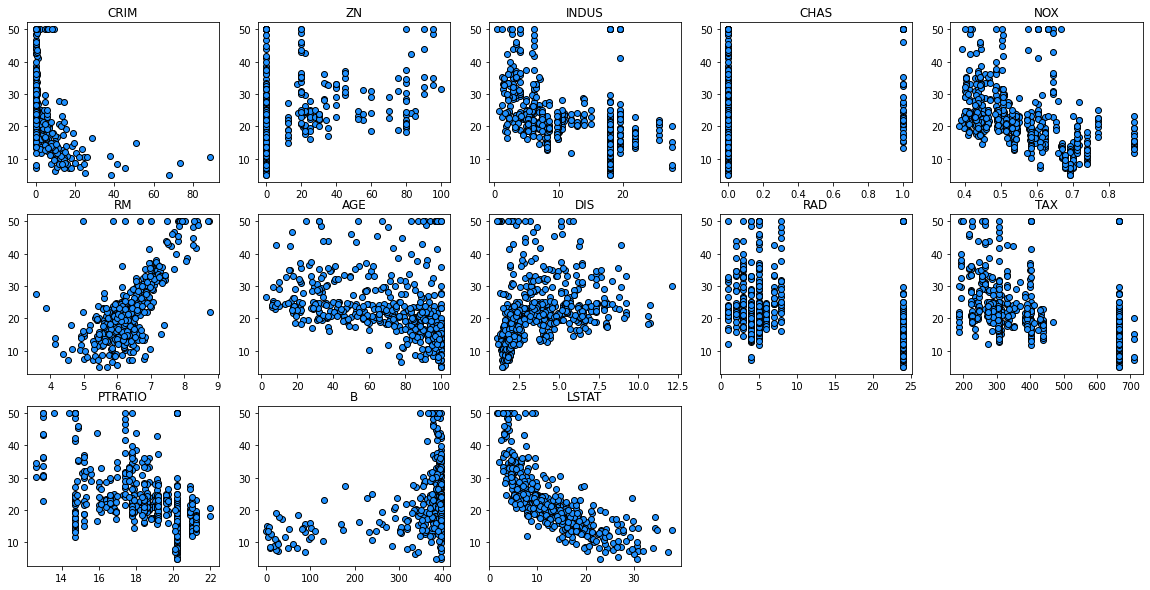

In [ ]:
i=-1
j=0
fig = plt.figure(figsize=(20,10))
for feature in boston['feature_names']:
  if i==4:
    j+=1
    i=0
  else:
    i+=1
  ax = plt.subplot2grid((3, 5), (j, i), colspan=1)
  selector = (boston['feature_names'] == feature)
  ax.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
  plt.title(feature)
plt.show()
  
 

## Ejercicio 3: Regresión Lineal

1. Seleccione **un solo atributo** que considere puede ser el más apropiado.
2. Instancie una regresión lineal de **scikit-learn**, y entrénela usando sólo el atributo seleccionado.
3. Evalúe, calculando error cuadrático medio para los conjuntos de entrenamiento y evaluación.
4. Grafique el modelo resultante, junto con los puntos de entrenamiento y evaluación.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se puede obtener un error en test menor a 50.

In [ ]:
# 1.:

feature = 'RM'      # cambiado este valor podemos tomar distintas variables (X) del dataset, acá selecciono el atributo 'RM'

#feature_name es un array con los nombres de las demás entradas del diccionario
#esto te devuelve un arreglo booleano con True en la posición de la columna que corresponde al feature
selector = (boston['feature_names'] == feature) 

#X_train y X_test son arrays de arrays
#cada fila es un vector que tiene todos los valores de una unidad muestral
#esto toma todas las filas (la muestra entera) pero solo guarda el valor en la posición que corresponde al feature seleccionado (la variable de interés)
X_train_f = X_train[:, selector]
X_test_f = X_test[:, selector]

X_train_f.shape, X_test_f.shape 
# En scikit-learn cada dato de entrada debe ser un vector, no un número. 
# Debemos convertir cada dato en un vector de una dimensión
# en este caso X_train_f ya es un vector de filas, caso contrario debería aplicarse
# X_train_f = X_train_f.reshape(-1, 1)  

((404, 1), (102, 1))

In [ ]:
# 2. Instanciar y entrenar
from sklearn.linear_model import LinearRegression  #importa el modelo de regresion lineal 

modelo_lineal = LinearRegression(fit_intercept=True)       #instanciando el modelo de regresion lineal, fit_intercept=True porque 
                                                   #solo le vamos a pasar x^1, no el termino de x^0, si incluyeramos antes 
                                                   #un preporcesamiento con PolynomialFeatures, se deberia poner False.

modelo_lineal.fit(X_train_f, y_train)                      #Entrenamiento del modelo de regresión Lineal

#Impresión de los valores de ordenada y pendiente
print('Ordenada al origen:',modelo_lineal .intercept_,'Pendiente:',modelo_lineal .coef_)


Ordenada al origen: -36.476189627647315 Pendiente: [9.37638431]


In [ ]:
# 3. Predecir y evaluar acá.
from sklearn.metrics import mean_squared_error        #Para calcular el error y evaluar el modelo

#Predicciones
y_train_predict=modelo_lineal.predict(X_train_f)
y_test_predict=modelo_lineal.predict(X_test_f)

#Evaulación del error
train_error_LR = mean_squared_error(y_train, y_train_predict)
test_error_LR = mean_squared_error(y_test, y_test_predict)

#Impresión del error calculado
print(f'Train error: {round(train_error_LR,2)}')
print(f'Test error: {round(test_error_LR,2)}')

Train error: 42.82
Test error: 46.91


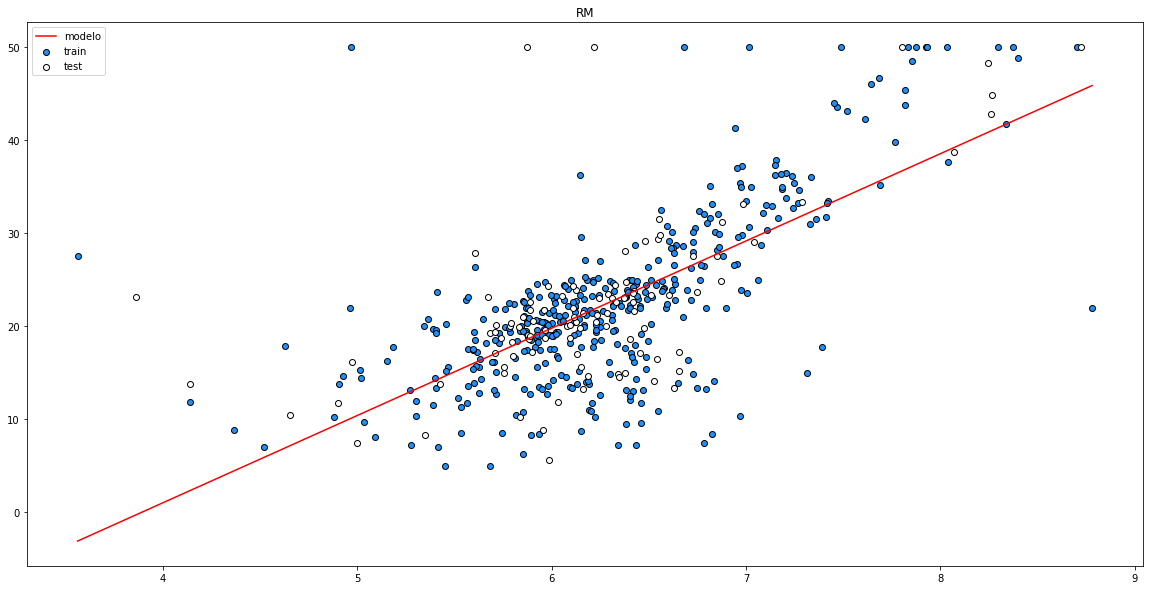

In [ ]:
# 4. Graficar
fig = plt.figure(figsize=(20,10))
x_start = min(np.min(X_train_f), np.min(X_test_f))
x_end = max(np.max(X_train_f), np.max(X_test_f))

x = np.linspace(x_start, x_end, 200).reshape(-1, 1)         #Dominio sobre el que vamos a graficar el modelo
                        
plt.plot(x, modelo_lineal.predict(x), color="red", label="modelo")  #Grafica del modelo

plt.scatter(X_train_f, y_train, facecolor="dodgerblue", edgecolor="k", label="train") #Grafica del conjunto de entrenamiento
plt.scatter(X_test_f, y_test, facecolor="white", edgecolor="k", label="test")         #Grafica del conjunto de prueba

plt.title(feature)
plt.legend()
plt.show()



## Ejercicio 4: Regresión Polinomial

En este ejercicio deben entrenar regresiones polinomiales de diferente complejidad, siempre usando **scikit-learn**.

Deben usar **el mismo atributo** seleccionado para el ejercicio anterior.

1. Para varios grados de polinomio, haga lo siguiente:
    1. Instancie y entrene una regresión polinomial.
    2. Prediga y calcule error en entrenamiento y evaluación. Imprima los valores.
    3. Guarde los errores en una lista.
2. Grafique las curvas de error en términos del grado del polinomio.
3. Interprete la curva, identificando el punto en que comienza a haber sobreajuste, si lo hay.
4. Seleccione el modelo que mejor funcione, y grafique el modelo conjuntamente con los puntos.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se pueden obtener errores en test menores a 40 e incluso a 35.

Reg. pol. de grado:0, error de train:85.14; error de test:81.58
Reg. pol. de grado:1, error de train:42.82; error de test:46.91
Reg. pol. de grado:2, error de train:37.75; error de test:39.79
Reg. pol. de grado:3, error de train:36.4; error de test:39.83
Reg. pol. de grado:4, error de train:34.81; error de test:41.55
Reg. pol. de grado:5, error de train:33.13; error de test:41.04
Reg. pol. de grado:6, error de train:33.13; error de test:41.01
Reg. pol. de grado:7, error de train:33.06; error de test:42.39
Reg. pol. de grado:8, error de train:33.06; error de test:42.4


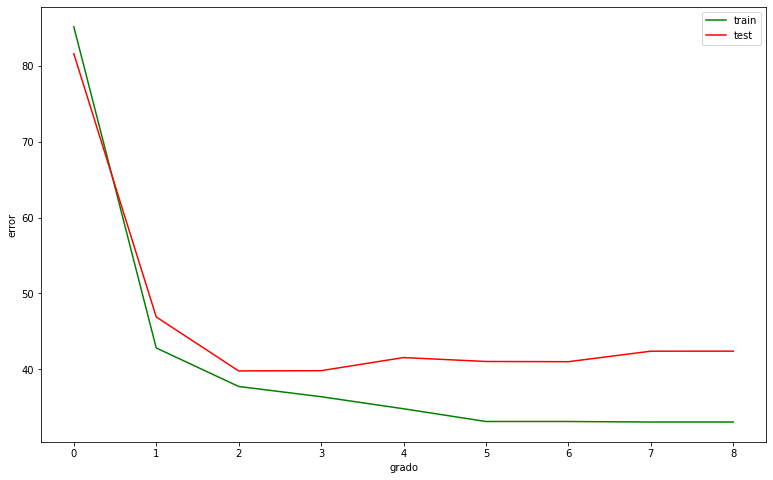

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures #<https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html>

#La regresión polinomial no es más que una regresión lineal multiple en cada pseudo variable X^i con i=0,1,...,k (polynomial features)
# Genera una nueva matriz que consiste en todas las combinaciones polinómicas X^i con i=0,1,...,k
# de las características con grado menor o igual al grado especificado.

##1. Instancie y entrene una regresión polinomial.

grados=[0,1,2,3,4,5,6,7,8]    #Grados de polinomios que valos a probar
modelos=dict()                #Diccionario para guardar los modelos
train_errors_PR=[]            #Lista para guardar errores de entrenamiento
test_errors_PR=[]             #Lista para guardar errores de prueba

for grado in grados:          #Loop para recorrer los distintos grados

    # Instancia:
    pf = PolynomialFeatures(grado)              #Definimos el grado a utilizar en el pre-procedador 
    lr = LinearRegression(fit_intercept=False)  #como vamos a usar el preprosedor de PolynomialFeatures--->fit_intercept=False

    modelos[grado] = make_pipeline(pf, lr)      #Instanciamos el modelo con un pipeline, pipeline es para darle un orden de trabajo al modelo
                                                #primero hace el preprocesamiento y luego con eso alimenta al modelo de regresion (es para ahorrar codigo)
    
    #Entrenamiento:
    modelos[grado] .fit(X_train_f, y_train)    #Entrenamiento de los modelos y guardado en el diccionario


    
    ##2. Prediga y calcule error en entrenamiento y evaluación. Imprima los valores.
    
    # Predicción:
    y_train_pred = modelos[grado] .predict(X_train_f)
    y_test_pred = modelos[grado] .predict(X_test_f)
    
    # Evaluciaón y calculo de error.
    train_error_PR = mean_squared_error(y_train, y_train_pred)
    test_error_PR = mean_squared_error(y_test, y_test_pred)
    

    # Imprima los valores.
    print(f'Reg. pol. de grado:{grado}, error de train:{round(train_error_PR,2)}; error de test:{round(test_error_PR,2)}')

##3. Guarde los errores en una lista.
    train_errors_PR.append(train_error_PR)
    test_errors_PR.append(test_error_PR)
    
# 2. Graficar curvas de error.
fig = plt.figure(figsize=(13,8))
plt.plot(grados, train_errors_PR, color="green", label="train")
plt.plot(grados, test_errors_PR, color="red", label="test")
plt.legend()
plt.xlabel("grado")
plt.ylabel("error")
plt.show()

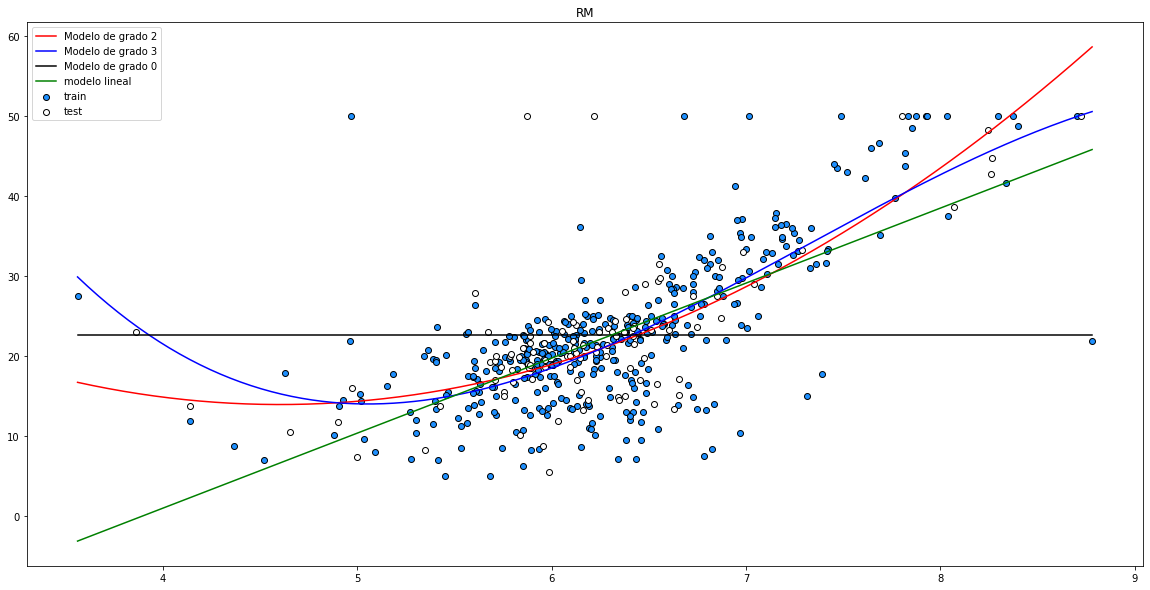

In [ ]:
# 4. Reconstruir mejor modelo acá y graficar.
grado_error_min=test_errors_PR.index(np.min(test_errors_PR))  #Obtención del grado de polinomio con minimo error
mejor_modelo_pr=modelos[grado_error_min]                               #Seleccion del modelo con error minimo

x_start = min(np.min(X_train_f), np.min(X_test_f))
x_end = max(np.max(X_train_f), np.max(X_test_f))
x = np.linspace(x_start, x_end, 200).reshape(-1, 1)

#impresion de mejor modelo y modelo lineal anterior
fig = plt.figure(figsize=(20,10))
plt.plot(x, mejor_modelo_pr.predict(x), color="red", label=f'Modelo de grado {grado_error_min}')
plt.plot(x, modelos[3] .predict(x), color="blue", label=f'Modelo de grado {3}')
plt.plot(x, modelos[0] .predict(x), color="black", label=f'Modelo de grado {0}')
plt.plot(x, modelo_lineal.predict(x), color="green", label="modelo lineal")

#Impresion de conjuntos de entrenamiento y prueba
plt.scatter(X_train_f, y_train, facecolor="dodgerblue", edgecolor="k", label="train")
plt.scatter(X_test_f, y_test, facecolor="white", edgecolor="k", label="test")

plt.title(feature)
plt.legend()
plt.show()

## Ejercicio 5: Regresión con más de un Atributo

En este ejercicio deben entrenar regresiones que toman más de un atributo de entrada.

1. Seleccione **dos o tres atributos** entre los más relevantes encontrados en el ejercicio 2.
2. Repita el ejercicio anterior, pero usando los atributos seleccionados. No hace falta graficar el modelo final.
3. Interprete el resultado y compare con los ejercicios anteriores. ¿Se obtuvieron mejores modelos? ¿Porqué?

**Ejemplo multivariable para entender**

Nuestros datos:
$$
\overbrace{\begin{pmatrix}
3 & 5 \\
1 & -4 \\
-3 & 5 
\end{pmatrix}}^{(x_1 , x_2)}
\overbrace{\begin{pmatrix}
10 \\
8 \\
-10  
\end{pmatrix}}^{y}$$

Queremos hacer una regresión polinomial por lo que buscamos algo así:
$$
y=w_0+w_1 x_1+w_2 x_2+w_3 x_1 x_2+w_4 x_1^2+w_5 x_2^2\\
$$
o lo que es lo mismo:
$$ y=\begin{pmatrix}w_0 & w_1 & w_2 & w_3 & w_4 & w_5\end{pmatrix}*\begin{pmatrix}1 \\ x_1 \\ x_2 \\ x_1 x_2 \\ x_1^2 \\ x_2^2\end{pmatrix}\\
y=W*X
$$
El modelo **LinearRegression**, obtiene $W$ en función de nuestros datos, pero para eso le tenemos que dar los datos de la forma: $$\begin{pmatrix}1 & x_1 & x_2 & x_1 x_2 & x_1^2 & x_2^2\end{pmatrix}$$

y los tenemos de la forma $$(x_1,x_2)$$
para pasar los datos de una forma a la otra usamos **PolynomialFeatures()**

que en base al ejemplo nos daria el siguiente resultado:

$$
\overbrace{\begin{pmatrix}
3 & 5 \\
1 & -4 \\
-3 & 5 
\end{pmatrix}}^{(x_1 , x_2)}\to
\overbrace{\begin{pmatrix}
1 & 3 & 5 & 15& 9&25\\
1 & 1 & -4 & -4&1 &16\\
1 & -3 & 5 & -15&9 &25
\end{pmatrix}}^{\begin{pmatrix}1 & x_1 & x_2 & x_1 x_2 & x_1^2 & x_2^2\end{pmatrix}}
$$
Ahora si se puede entrenar el modelo  **LinearRegression**, para obtener $W$, el parametro `fit_intercept` es igual a **True** si no le dieramos el primer $1$ asociado a $x^0$, **False** cuando si se lo damos

In [ ]:
# 1.:
#Se eligen los atributos 'RM' y 'LSTAT' por parecer ser los más relevantes al problema en si
selector = (boston['feature_names'] == 'RM') | (boston['feature_names'] == 'LSTAT')

X_train_fs = X_train[:, selector]
X_test_fs = X_test[:, selector]

#X_train_fs = X_train_fs.reshape(-1, 1)
X_train_fs.shape, X_test_fs.shape


((404, 2), (102, 2))

Reg. pol. de grado:1, error de train:28.79; error de test:37.38
Reg. pol. de grado:2, error de train:18.66; error de test:28.14
Reg. pol. de grado:3, error de train:17.08; error de test:28.57
Reg. pol. de grado:4, error de train:14.19; error de test:34.0
Reg. pol. de grado:5, error de train:12.91; error de test:34.2


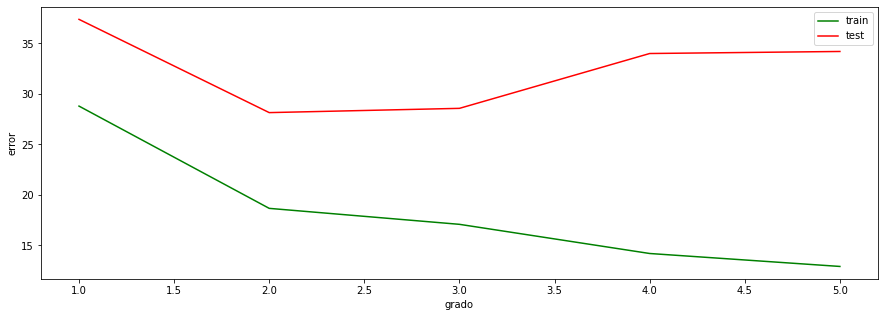

In [ ]:
# 2. 

grados=[1,2,3,4,5]        #Grados de polinomios que valos a probar
modelos=dict()            #Diccionario para guardar los modelos

train_errors_PR_fs=[]     #Lista para guardar errores de entrenamiento
test_errors_PR_fs=[]      #Lista para guardar errores de prueba

for grado in grados:

    # Instancia:
    pf = PolynomialFeatures(grado)
    lr = LinearRegression(fit_intercept=False)

    modelos[grado] = make_pipeline(pf, lr)

    #Entrenamiento:
    modelos[grado] .fit(X_train_fs, y_train)
    
    # Predicción:
    y_train_pred = modelos[grado] .predict(X_train_fs)
    y_test_pred = modelos[grado] .predict(X_test_fs)
    
    # Evaluciaón y calculo de error.
    train_error_PR_fs = mean_squared_error(y_train, y_train_pred)
    test_error_PR_fs = mean_squared_error(y_test, y_test_pred)
    
    # Impresión de valores.

    print(f'Reg. pol. de grado:{grado}, error de train:{round(train_error_PR_fs,2)}; error de test:{round(test_error_PR_fs,2)}')

## Guardado de los errores en una lista.
    train_errors_PR_fs.append(train_error_PR_fs)
    test_errors_PR_fs.append(test_error_PR_fs)
    
# Grafica de curvas de error.
fig = plt.figure(figsize=(15,5))
plt.plot(grados, train_errors_PR_fs, color="green", label="train")
plt.plot(grados, test_errors_PR_fs, color="red", label="test")

plt.legend()
plt.xlabel("grado")
plt.ylabel("error")
plt.show()



2


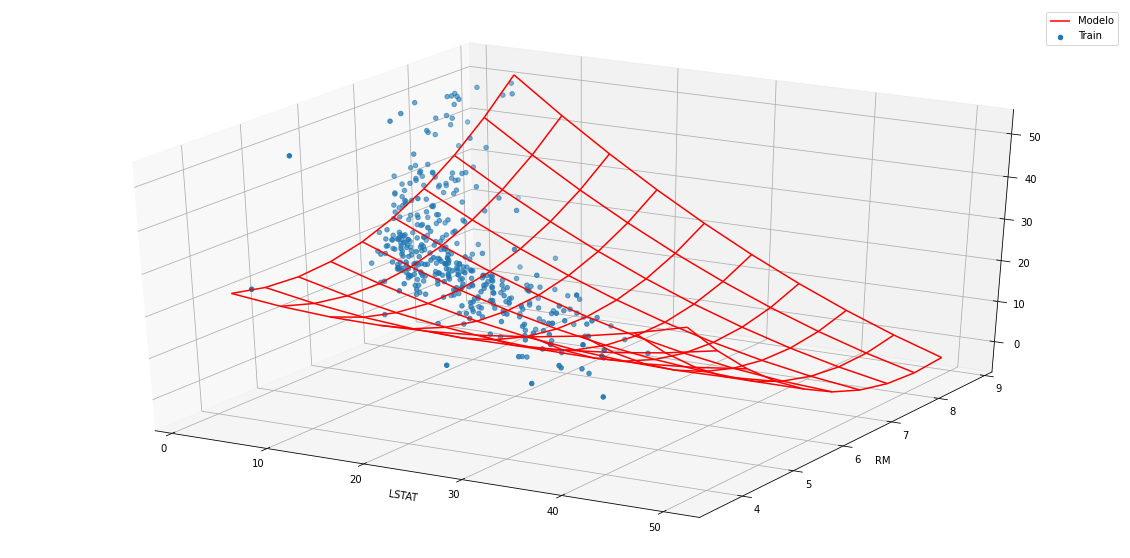

In [ ]:
#GRAFICA DEL MODELO, no es necesario

# Reconstruir mejor modelo
grado_error_min=test_errors_PR_fs.index(np.min(test_errors_PR_fs))+1  #Obtención del grado de polinomio con minimo error (el más 1 es porque arrancamos de 1, no de 0)
mej_modelo=modelos[grado_error_min]                                       #Seleccion del modelo con error minimo

print(grado_error_min)
# importamos las librerias necesarias para grafica en 3d
from mpl_toolkits.mplot3d import axes3d

# Creamos la figura
fig = plt.figure(figsize=(20,10))
# Creamos el plano 3D
ax1 = fig.add_subplot(111, projection='3d')

# Definimos los datos para graficar
x1 = X_train_fs[:,0]
y1 = X_train_fs[:,1]
z1 = y_train

# Grilla para poder dibujar el modelo
x_start = np.min(x)
x_end =np.max(x)
xx = np.linspace(x_start, x_end, 10).reshape(-1, 1)

y_start = np.min(y)
y_end =np.max(y)
yy = np.linspace(y_start, y_end, 10).reshape(-1, 1)

X, Y = np.meshgrid(yy,xx)       #Grilla en x y

#Valuación del modelo en la grilla.
z=np.zeros((10,10))
for i,n in zip(xx,range(10)):
  for j,m in zip(yy,range(10)):
    ij=np.array([i,j])
    z[n][m]= mej_modelo.predict(ij.reshape(1,2))

#Grafico del modelo en formato estructura de alambre
ax1.plot_wireframe(X,Y,z,color='r',label='Modelo')

ax1.scatter(y1, x1, z1, marker='o',depthshade=True,label='Train')
plt.legend()
plt.xlabel("LSTAT")
plt.ylabel("RM")
# Mostramos el gráfico
plt.show()

## Más ejercicios (opcionales)

### Ejercicio 7: A Todo Feature

Entrene y evalúe regresiones pero utilizando todos los atributos de entrada (va a andar mucho más lento). Estudie los resultados.



In [ ]:
#Funcion para hacer el estudio
def regresion(feature_names,X_train,X_test,y_train,y_test,grados):
  selector  = np.isin(boston['feature_names'], feature_names)
  X_train_fes = X_train[:, selector]
  X_test_fes = X_test[:, selector]

  modelos=dict()
  train_errors=[]
  test_errors=[]

  for grado in grados:
      # Instancia:
      pf = PolynomialFeatures(grado)
      lr = LinearRegression(fit_intercept=False)
      modelos[grado] = make_pipeline(pf, lr)
      
      #Entrenamiento:
      modelos[grado] .fit(X_train_fes, y_train)
      
      # Predicción:
      y_train_pred = modelos[grado] .predict(X_train_fes)
      y_test_pred = modelos[grado] .predict(X_test_fes)
      
      # Evaluciaón y calculo de error.
      train_error = mean_squared_error(y_train, y_train_pred)
      test_error = mean_squared_error(y_test, y_test_pred)
      
      # Imprima los valores.

      print(f'Reg. pol. de grado:{grado}, error de train:{round(train_error,2)}; error de test:{round(test_error,2)}')

  ## Guarde los errores en una lista.
      train_errors.append(train_error)
      test_errors.append(test_error)
      
  # Graficar curvas de error.
  plt.title(feature_names)
  plt.plot(grados, train_errors, color="green", label="train")
  plt.plot(grados, test_errors, color="red", label="test")
  plt.legend()
  plt.xlabel("grado")
  plt.ylabel("error")
  plt.show()

CRIM
Reg. pol. de grado:1, error de train:70.75; error de test:76.39
Reg. pol. de grado:2, error de train:64.52; error de test:76.62
Reg. pol. de grado:3, error de train:63.45; error de test:77.75
Reg. pol. de grado:4, error de train:63.07; error de test:79.19
Reg. pol. de grado:5, error de train:63.07; error de test:79.18


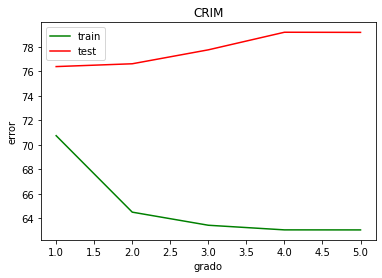

ZN
Reg. pol. de grado:1, error de train:70.84; error de test:84.66
Reg. pol. de grado:2, error de train:69.82; error de test:85.32
Reg. pol. de grado:3, error de train:67.4; error de test:83.4
Reg. pol. de grado:4, error de train:67.4; error de test:83.43
Reg. pol. de grado:5, error de train:67.36; error de test:83.38


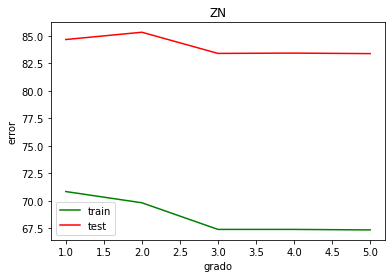

INDUS
Reg. pol. de grado:1, error de train:61.67; error de test:77.03
Reg. pol. de grado:2, error de train:57.26; error de test:80.7
Reg. pol. de grado:3, error de train:56.01; error de test:82.56
Reg. pol. de grado:4, error de train:55.9; error de test:82.23
Reg. pol. de grado:5, error de train:55.85; error de test:82.33


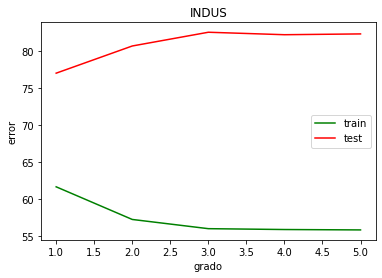

CHAS
Reg. pol. de grado:1, error de train:82.46; error de test:79.36
Reg. pol. de grado:2, error de train:82.46; error de test:79.36
Reg. pol. de grado:3, error de train:82.46; error de test:79.36
Reg. pol. de grado:4, error de train:82.46; error de test:79.36
Reg. pol. de grado:5, error de train:82.46; error de test:79.36


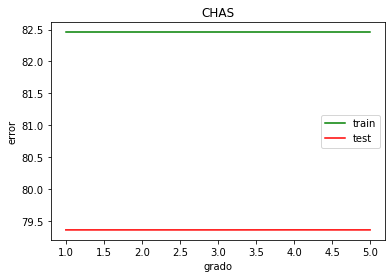

NOX
Reg. pol. de grado:1, error de train:67.16; error de test:76.95
Reg. pol. de grado:2, error de train:66.7; error de test:76.84
Reg. pol. de grado:3, error de train:66.29; error de test:75.66
Reg. pol. de grado:4, error de train:66.07; error de test:75.58
Reg. pol. de grado:5, error de train:66.02; error de test:75.43


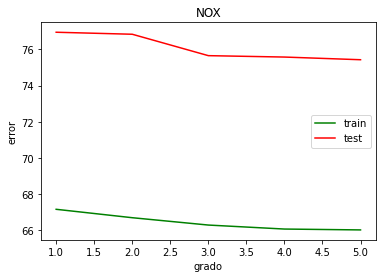

RM
Reg. pol. de grado:1, error de train:42.82; error de test:46.91
Reg. pol. de grado:2, error de train:37.75; error de test:39.79
Reg. pol. de grado:3, error de train:36.4; error de test:39.83
Reg. pol. de grado:4, error de train:34.81; error de test:41.55
Reg. pol. de grado:5, error de train:33.13; error de test:41.04


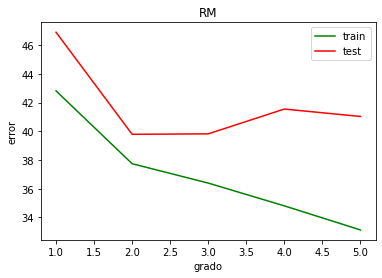

AGE
Reg. pol. de grado:1, error de train:70.6; error de test:80.39
Reg. pol. de grado:2, error de train:68.6; error de test:83.74
Reg. pol. de grado:3, error de train:68.6; error de test:83.48
Reg. pol. de grado:4, error de train:68.31; error de test:83.63
Reg. pol. de grado:5, error de train:68.31; error de test:83.72


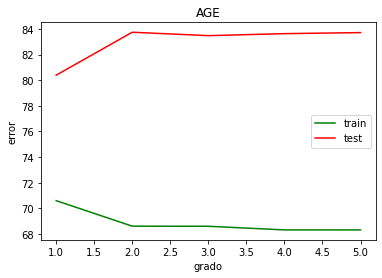

DIS
Reg. pol. de grado:1, error de train:78.42; error de test:82.62
Reg. pol. de grado:2, error de train:74.82; error de test:83.19
Reg. pol. de grado:3, error de train:73.58; error de test:84.46
Reg. pol. de grado:4, error de train:73.53; error de test:84.81
Reg. pol. de grado:5, error de train:73.45; error de test:86.36


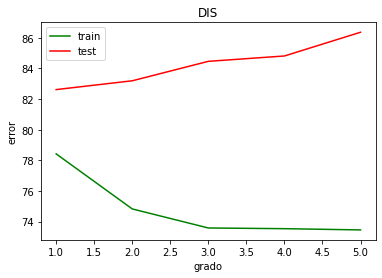

RAD
Reg. pol. de grado:1, error de train:69.76; error de test:82.46
Reg. pol. de grado:2, error de train:69.49; error de test:79.95
Reg. pol. de grado:3, error de train:68.34; error de test:76.28
Reg. pol. de grado:4, error de train:68.17; error de test:74.72
Reg. pol. de grado:5, error de train:67.97; error de test:74.59


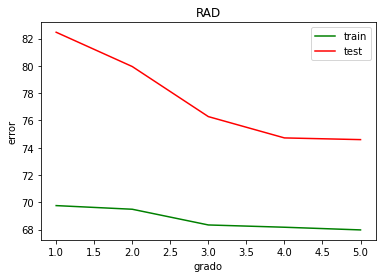

TAX
Reg. pol. de grado:1, error de train:62.91; error de test:78.31
Reg. pol. de grado:2, error de train:62.34; error de test:78.33
Reg. pol. de grado:3, error de train:62.1; error de test:78.71
Reg. pol. de grado:4, error de train:62.07; error de test:78.7
Reg. pol. de grado:5, error de train:61.91; error de test:79.45


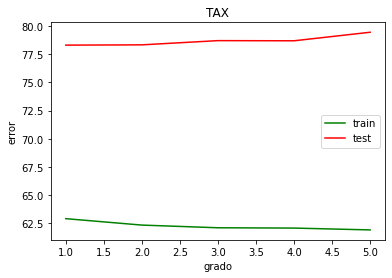

PTRATIO
Reg. pol. de grado:1, error de train:58.1; error de test:81.79
Reg. pol. de grado:2, error de train:57.83; error de test:81.43
Reg. pol. de grado:3, error de train:57.61; error de test:80.19
Reg. pol. de grado:4, error de train:54.98; error de test:77.62
Reg. pol. de grado:5, error de train:54.01; error de test:77.35


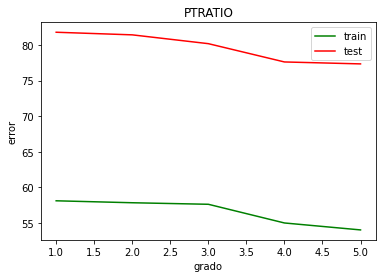

B
Reg. pol. de grado:1, error de train:74.46; error de test:77.75
Reg. pol. de grado:2, error de train:73.93; error de test:79.58
Reg. pol. de grado:3, error de train:73.88; error de test:79.71
Reg. pol. de grado:4, error de train:73.62; error de test:78.3
Reg. pol. de grado:5, error de train:72.24; error de test:74.15


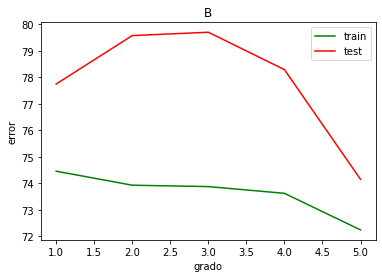

LSTAT
Reg. pol. de grado:1, error de train:36.52; error de test:46.34
Reg. pol. de grado:2, error de train:28.19; error de test:38.85
Reg. pol. de grado:3, error de train:26.78; error de test:37.22
Reg. pol. de grado:4, error de train:25.85; error de test:34.7
Reg. pol. de grado:5, error de train:25.03; error de test:34.83


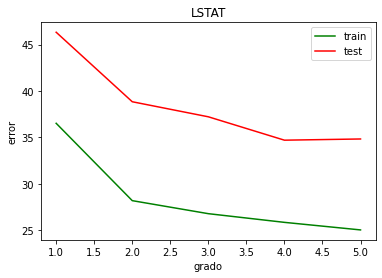

In [ ]:
#Modelado para cada uno de los atributos independientemente
grados=[1,2,3,4,5]
for feature_name in boston['feature_names']:
  print(feature_name)
  regresion(feature_name,X_train,X_test,y_train,y_test,grados)


Reg. pol. de grado:1, error de train:19.33; error de test:33.45
Reg. pol. de grado:2, error de train:4.34; error de test:31.28
Reg. pol. de grado:3, error de train:0.0; error de test:976575.88
Reg. pol. de grado:4, error de train:0.0; error de test:950756.91
Reg. pol. de grado:5, error de train:0.0; error de test:195453.64


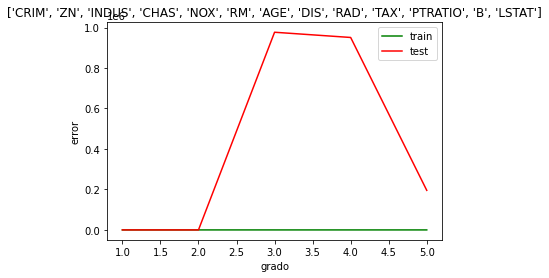

In [ ]:
#Modelado todos los atributos juntos
grados=[1,2,3,4,5]
regresion(list(boston['feature_names']),X_train,X_test,y_train,y_test,grados)

La regresión polinomial de segundo grado, con dos atributos dio un error de 28.14, en este caso con todos los atributos el error es de 31.28, el modelo empeoró. Tambien se ve sobre ajuste a partir del 3er grado

### Ejercicio 8: Regularización

Entrene y evalúe regresiones con regularización "ridge". Deberá probar distintos valores de "alpha" (fuerza de la regularización). ¿Mejoran los resultados?

**Aplicado a la regresion polinomica con multiples atributos**

In [ ]:
from sklearn.linear_model import Ridge
n_alphas=100
alphas_fs=np.logspace(-2, 1.7, n_alphas)
grados_fs=[1,2,3,4]

Train_errors_alpha_fs=np.empty((n_alphas,len(grados_fs)))
Test_errors_alpha_fs=np.empty((n_alphas,len(grados_fs)))
Coefs_fs=dict()

for grado in grados_fs:
  train_errors_alpha=[]
  test_errors_alpha=[]
  coefs=[]
  for alpha in alphas_fs:
    # Instancia:
    pf = PolynomialFeatures(grado)
    clf = Ridge(alpha=alpha)

    model = make_pipeline(pf,clf)

    model.fit(X_train_fs, y_train)

    # Predicción:
    y_train_pred = model .predict(X_train_fs)
    y_test_pred = model .predict(X_test_fs)
      
    # Evaluciaón y calculo de error.
    train_error_alpha = mean_squared_error(y_train, y_train_pred)
    test_error_alpha = mean_squared_error(y_test, y_test_pred)
    #Pesos
    coefs.append(clf.coef_)

    ##3. Guarde los errores en una lista.
    train_errors_alpha.append(train_error_alpha)
    test_errors_alpha.append(test_error_alpha)

  Train_errors_alpha_fs[:,grado-1]=np.array(train_errors_alpha).reshape(1,-1)
  Test_errors_alpha_fs[:,grado-1]=np.array(test_errors_alpha).reshape(1,-1)
  Coefs_fs[grado]=coefs

In [ ]:
error_alpha=np.min(Test_errors_alpha_fs)
error_PR_fs=min( test_errors_PR_fs)
ind = np.unravel_index(np.argmin(Test_errors_alpha_fs, axis=None), Test_errors_alpha_fs.shape)
alpha_min=alphas_fs[ind[0]]
grado_min=grados_fs[ind[1]]

print(f'Grado 2, Sin alpha Error:{round(error_PR_fs,2)}, grado {grado_min} con alpha de {round(alpha_min,4)}  Error:{round(error_alpha,2)}')

In [ ]:
  # 2. Graficar curvas de error.
  fig = plt.figure(figsize=(20,5))
  plt.plot(alphas_fs, Train_errors_alpha_fs[:,grado_min-1], color="green", label="train")
  plt.plot(alphas_fs, Test_errors_alpha_fs[:,grado_min-1], color="red", label="test")
  plt.legend()
  plt.xlabel("alphas")
  plt.ylabel("error")
  plt.show()
  fig = plt.figure(figsize=(20,5))
  plt.plot(alphas_fs, Coefs_fs[grado_min])
  plt.xlabel("alphas")
  plt.ylabel("coef")
  plt.show()

Probando nuevamente con respecto a la Regresión polinomial con multiples atributos, nos habia dado el menor error con 2o grado, ahora cambiando alphas, nos da que la mejor combinación grado alphas es de 3er grado, alpha de 35.5226, bajando el error de 28.14 a 28.1. La disminucion no parece muy significativa y el alpha es muy grande como para cambiar de modelo.

**Aplicado a la regresión polinomial con solo un atributo**

In [ ]:
from sklearn.linear_model import Ridge
n_alphas=100
alphas=np.logspace(-2, 0, n_alphas)
grados=[1,2,3,4]

Train_errors_alpha=np.empty((n_alphas,len(grados)))
Test_errors_alpha=np.empty((n_alphas,len(grados)))
Coefs=dict()
modelos=dict()
for grado in grados:
  train_errors_alpha=[]
  test_errors_alpha=[]
  coefs=[]
  modelos[grado]=dict()
  for alpha in alphas:
    # Instancia:
    pf = PolynomialFeatures(grado)
    clf = Ridge(alpha=alpha)

    modelos[grado][alpha] = make_pipeline(pf,clf)

    modelos[grado][alpha].fit(X_train_f, y_train)

    # Predicción:
    y_train_pred = modelos[grado][alpha] .predict(X_train_f)
    y_test_pred = modelos[grado][alpha] .predict(X_test_f)
      
    # Evaluciaón y calculo de error.
    train_error_alpha = mean_squared_error(y_train, y_train_pred)
    test_error_alpha = mean_squared_error(y_test, y_test_pred)
    
    #Pesos
    coefs.append(clf.coef_)

    ##3. Guarde los errores en una lista.
    train_errors_alpha.append(train_error_alpha)
    test_errors_alpha.append(test_error_alpha)

  Train_errors_alpha[:,grado-1]=np.array(train_errors_alpha).reshape(1,-1)
  Test_errors_alpha[:,grado-1]=np.array(test_errors_alpha).reshape(1,-1)
  Coefs[grado]=coefs

In [ ]:
error_alpha=np.min(Test_errors_alpha)
error_PR=min( test_errors_PR)
ind = np.unravel_index(np.argmin(Test_errors_alpha, axis=None), Test_errors_alpha.shape)
alpha_min=alphas[ind[0]]
grado_min=grados[ind[1]]

mejor_modelo_ri=modelos[grado_min][alpha_min]

print(f'Grado 2, Sin alpha Error:{round(error_PR,2)}, grado {grado_min} con alpha de {round(alpha_min,4)}  Error:{round(error_alpha,2)}')

Grado 2, Sin alpha Error:39.79, grado 3 con alpha de 0.0385  Error:39.24


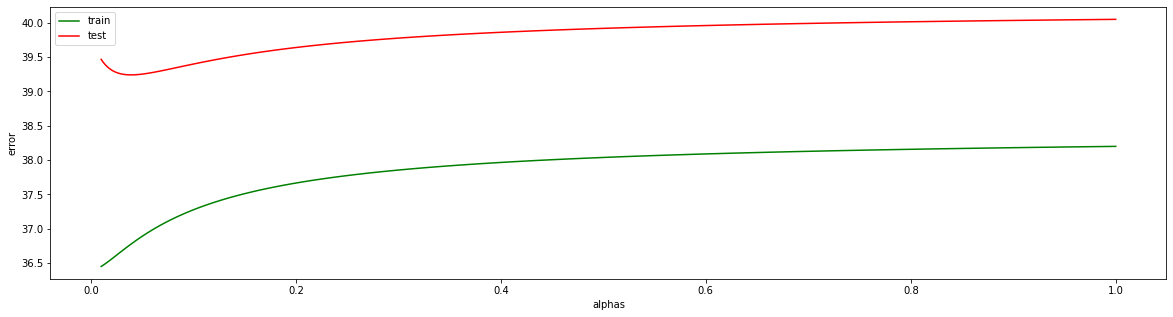

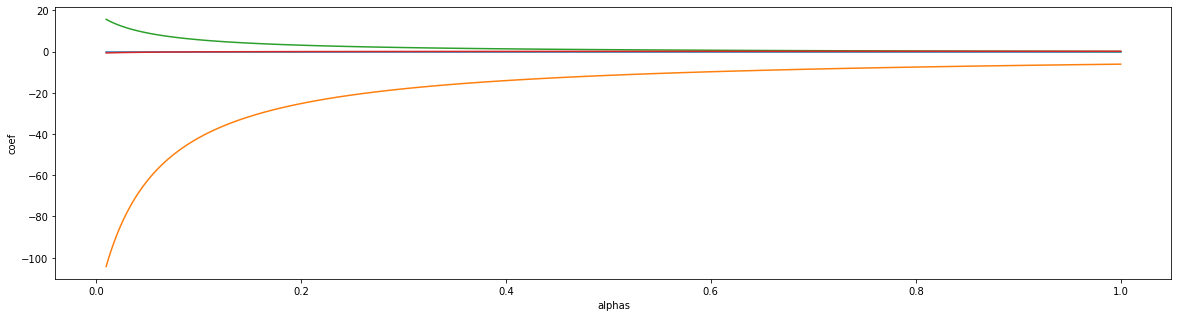

In [ ]:
  #Graficar curvas de error.
  fig = plt.figure(figsize=(20,5))
  plt.plot(alphas, Train_errors_alpha[:,grado_min-1], color="green", label="train")
  plt.plot(alphas, Test_errors_alpha[:,grado_min-1], color="red", label="test")
  plt.legend()
  plt.xlabel("alphas")
  plt.ylabel("error")
  plt.show()
  fig = plt.figure(figsize=(20,5))
  plt.plot(alphas, Coefs[grado_min])
  plt.xlabel("alphas")
  plt.ylabel("coef")
  plt.show()

Probando nuevamente con respecto a la Regresión polinomial con un solo atributo, nos habia dado el menor error con 2o grado, ahora cambiando alphas, nos da que la mejor combinación grado alphas es de 3er grado, alpha de 0.0396, bajando el error de 39.79 a 39.24.

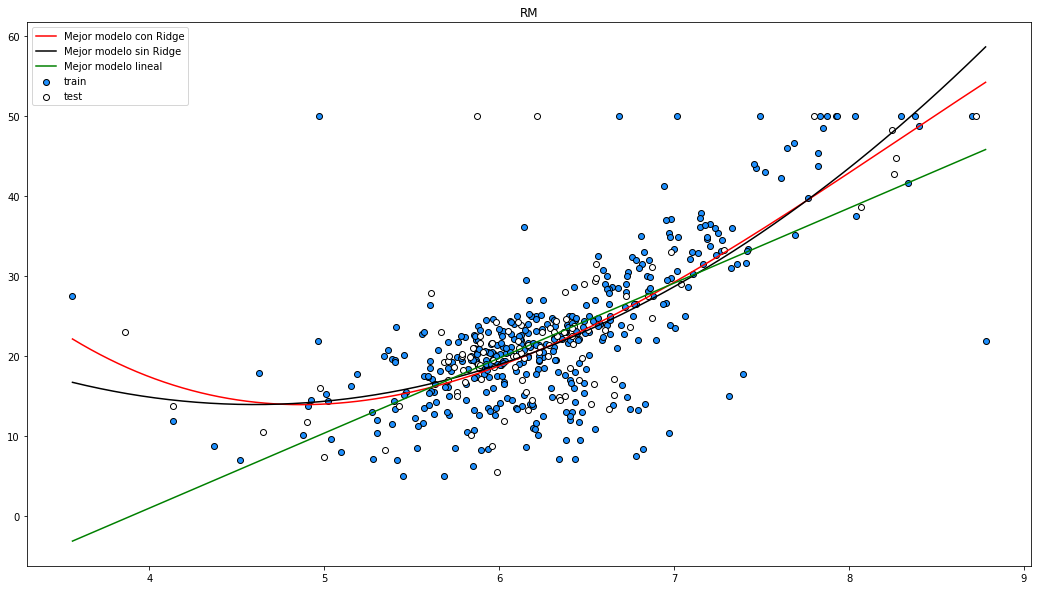

In [ ]:
# Mejor modelo acá y graficar.

x_start = min(np.min(X_train_f), np.min(X_test_f))
x_end = max(np.max(X_train_f), np.max(X_test_f))
x = np.linspace(x_start, x_end, 200).reshape(-1, 1)

#impresion de mejor modelo y modelo lineal anterior
fig = plt.figure(figsize=(18,10))
plt.plot(x, mejor_modelo_ri.predict(x), color="red", label='Mejor modelo con Ridge')
plt.plot(x, mejor_modelo_pr.predict(x), color="black", label='Mejor modelo sin Ridge')
plt.plot(x, modelo_lineal.predict(x), color="green", label="Mejor modelo lineal")

#Impresion de conjuntos de entrenamiento y prueba
plt.scatter(X_train_f, y_train, facecolor="dodgerblue", edgecolor="k", label="train")
plt.scatter(X_test_f, y_test, facecolor="white", edgecolor="k", label="test")

plt.title(feature)
plt.legend()
plt.show()